# TP3

## Introduction au bootstrap et aux méthodes gloutonnes

### Chargement des librairies

In [2]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from scipy.optimize import minimize
import functools
from sklearn.preprocessing import StandardScaler

sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)

## Exercice 1

### 1) Générer des valeurs:

In [18]:
# initialiser les paramètres de générations des
# vecteurs aléatoires
mu = 0
sigma = 1
n = 100
theta_0 = 1
theta_1 = np.array([[1], [1]])

# générer 100 vecteurs (x, y)
epsilon = np.random.normal(mu, sigma, size=(n, 1))
x = np.random.random(size=(2, n))
y = theta_0 + np.dot(np.transpose(x), theta_1) + epsilon

### 2) Tracer rho alpha

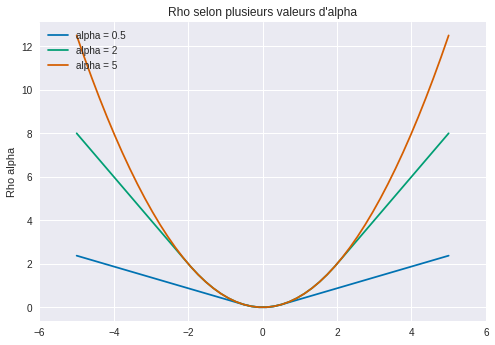

In [23]:
def rho(x, alpha):
    if alpha = 0:
        return abs(x)
    else:
        if abs(x) <= alpha:
            return (x**2)/2
        else:
            return alpha*abs(x) - (alpha**2)/2

# Etablir l'échelle des abscisses
xmin = -5
xmax = 5
abscisse = np.linspace(xmin, xmax, 50)
# Etablir les valeurs d'alphas
alphas = [0.5, 2, 5]

# Plot
fig = plt.figure()
for alpha in alphas:
    plt.plot(abscisse, list(map(rho, abscisse, np.repeat(alpha, len(abscisse)))), label='alpha = '+str(alpha))
plt.xlim(xmin-1, xmax+1)
plt.ylabel('Rho alpha')
plt.legend(numpoints=1, loc=2)
plt.title('Rho selon plusieurs valeurs d\'alpha')
plt.show()

Ainsi, alpha représente le seuil à partir duquel on diminue le poid des résidus par rapport à la norme deux.

### 3) Calculer Theta:

In [83]:
# definir la fonction à minimiser
def norm_a(theta, x, y, alpha):
    residuals = y - theta[0] - np.dot(np.transpose(x), np.array([[theta[1]], [theta[2]]]))
    return functools.reduce(sum, map(functools.partial(rho, alpha=alpha), residuals))

# calculer le theta_chap
alpha = 2
def theta_chap(alpha):
    return minimize(functools.partial(norm_a, x=x, y=y, alpha=alpha), 
                      (0, 0, 0), method='nelder-mead',options={'xtol': 1e-5}).x

# print du résultat
print("Pour alpha = %s, theta_chap vaut %s" %(alpha, theta_chap(alpha)))

Pour alpha = 2, theta_chap vaut [ 1.24653401  1.03037344  0.36648546]


### 4) Calculer un estimateur bootstrap:

In [72]:
# definir la procédure pour les prochaines valeurs d'alpha à venir
def theta_chap_B(alpha, B):
    theta_chap_B_int = np.array([])

    # démarer la procédure
    for b in range(B):

        # permuter les résidus
        residuals_b = np.random.permutation(epsilon)

        # créer une target synthétique
        y_b = y + residuals_b

        # enregistrer les theta_chap correspondant
        theta_chap_B_int = np.append(theta_chap_B_int, minimize(functools.partial(norm_a, x=x, y=y_b, alpha=alpha), 
                          (0, 0, 0), method='nelder-mead',options={'xtol': 1e-5}).x)

    # rendre les resultats en matrice (B, 3)
    return theta_chap_B_int.reshape(-1, 3)

# initialiser les paramètres du bootstrap
B = 200
alpha = 2
question_4 = theta_chap_B(alpha, B)
print(question_4)

### 5) Matrice de covariance, biais et erreur quadratique:

In [ ]:
# calculer un estimateur de la matrice de covariance
def mat_cov_theta(alpha, B):
    return np.cov(theta_chap_B(alpha, B).T)
cov_question_5 = mat_cov_theta(alpha, B)

# calculer un estimateur du biais de theta_chap
def biais_theta(alpha, B):
    return np.mean(theta_chap_B(alpha, B), axis=0) - theta_chap(alpha)
biais_question_5 = biais_theta(alpha, B)
print('Le biais est ', biais_question_5)

On remarque que l'erreur quadratique est égal à la norme du biais + la moyenne des variances des estimateurs bootstrap, d'où:

In [89]:
# calculer un estimateur de l'erreur quadratique
def EQM_boot(alpha, B):
    return np.linalg.norm(biais_theta(alpha, B)) + np.mean(np.diag(mat_cov_theta(alpha, B)))
EQM_question_5 = EQM_boot(alpha, B)
print(EQM_question_5)

### 6) Trouver l'alpha qui minimise le risque d'estimation:

Décrire une procédure pour trouver l'alpha qui minimise le risque d'estimation:

In [ ]:
# je ne comprends pas la question

Représenter graphiquement EQM en fonction d'alpha:

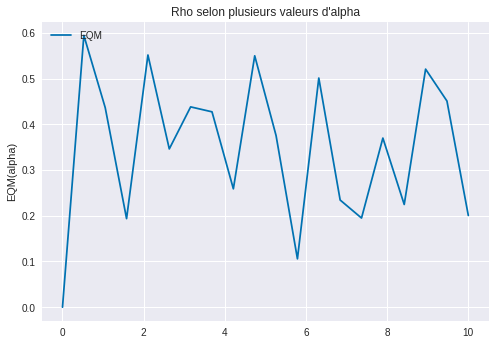

In [91]:
# initialiser les points à représenter
alphas = np.linspace(0, 10, 20)
eqm_alphas = list(map(functools.partial(EQM_boot, B=B), alphas))

# représenter ces points
fig = plt.figure()
plt.plot(alphas, eqm_alphas, label='EQM')
plt.ylabel('EQM')
plt.xlabel('alpha')
plt.legend(numpoints=1, loc=2)
plt.title('EQM en fonction d\'alpha')
plt.show()

### 7) Changer la loi de distribution des erreurs:

In [59]:
# initialiser les paramètres de générations des
# vecteurs aléatoires
n = 100
theta_0 = 1
theta_1 = np.array([[1], [1]])

# générer 100 vecteurs (x, y)
epsilon = np.random.standard_cauchy(n)
x = np.random.random(size=(2, n))
y = theta_0 + np.dot(np.transpose(x), theta_1) + epsilon

# initialiser les points à représenter
B = 2
alphas = np.linspace(0, 10, 20)
eqm_alphas = list(map(functools.partial(EQM_boot, B=B), alphas))

# représenter ces points
fig = plt.figure()
plt.plot(alphas, eqm_alphas, label='EQM')
plt.ylabel('EQM')
plt.xlabel('alpha')
plt.legend(numpoints=1, loc=2)
plt.title('EQM en fonction d\'alpha, erreur généré par une loi de Cauchy')
plt.show()

## Exercice 2

### 9) Stadardiser les données:

In [10]:
# Charger les données
import statsmodels.datasets as sd
data = sd.get_rdataset('airquality').data
# supprimer les valeurs manquantes
data = data.dropna()

# Séparer en variables explicatives et cible
X = data[['Solar.R', 'Wind', 'Temp', 'Month', 'Day']]
y = data [['Ozone']]

# Standardiser
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

### 10) Fonction stpforward:

In [20]:
from sklearn.base import RegressorMixin
import numpy as np
from sklearn.linear_model import LinearRegression


def stpforward(X, y, M):
    """Orthogonal Matching Pursuit model (OMP).
    X: Array-like, shape (n_samples, n_features).
    Training data.
    y: Array-like, shape (n_samples, ).
    Target values.
    M: Integer, in [1,n_features]
    """
    selected_variables = []
    residual = y
    p = X.shape[1]
    coef_selected = np.zeros(p)
    for i in range(1, M + 1):
        tab_alphaj = np.zeros(p)
        for j in range(0, p):
            if(j not in selected_variables):
                # Compute Alphaj and add it in tab_Alphaj
                Xj = X[:, j]
                # XXX: Get alpha_j value here
                valeur_alphaj = np.abs(Xj.dot(residual))
                tab_alphaj[j] = valeur_alphaj
        jmax = np.argmax(tab_alphaj)
        selected_variables.append(jmax)
        X_selected = X[:, selected_variables]
        # XXX: perform OLS over selected variables
        # initialiser l'ols
        skl_linmod = LinearRegression(fit_intercept=False, normalize=False)
        # fit ols
        skl_linmod = skl_linmod.fit(X_selected, y)
        # Store coefficients
        coef_selected[selected_variables] = skl_linmod.coef_
        # XXX: Update residual
        residual = y - skl_linmod.predict(X_selected)
    return coef_selected, selected_variables

### 11) Implémenter MYOMP:

In [26]:
class MYOMP(LinearRegression, RegressorMixin):
    """Orthogonal Matching Pursuit model (OMP).
    Parameters
    ----------
    n_nonzero_coefs : int, optional
    Desired number of non-zero entries in the solution. If None (by
    default) this value is set to 10% of n_features.
    """
    
    
    def __init__(self, n_nonzero_coefs=None, fit_intercept=False,
        normalize=False, precompute='auto'):
        self.fit_intercept = False
        self.normalize = normalize
        self.precompute = precompute
        self.n_nonzero_coefs = n_nonzero_coefs
        
        
    def fit(self, X, y):
        """Fit the model using X, y as training data.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        Training data.
        y : array-like, shape (n_samples,) or (n_samples, n_targets)
        Target values.
        Returns
        -------
        self : object
        returns an instance of self.
        """
        self.coef_ = np.zeros([X.shape[1], ])
        
        # Récuperer la taille du support voulu
        M = self.n_nonzero_coefs
        
        selected_variables = []
        residual = y
        p = X.shape[1]
        coef_selected = np.zeros(p)
        for i in range(1, M + 1):
            tab_alphaj = np.zeros(p)
            for j in range(0, p):
                if(j not in selected_variables):
                    # Compute Alphaj and add it in tab_Alphaj
                    Xj = X[:, j]
                    # XXX: Get alpha_j value here
                    valeur_alphaj = np.abs(Xj.dot(residual))
                    tab_alphaj[j] = valeur_alphaj
            jmax = np.argmax(tab_alphaj)
            selected_variables.append(jmax)
            X_selected = X[:, selected_variables]
            # XXX: perform OLS over selected variables
            # initialiser l'ols
            skl_linmod = LinearRegression(fit_intercept=False, normalize=False)
            # fit ols
            skl_linmod = skl_linmod.fit(X_selected, y)
            # Store coefficients
            coef_selected[selected_variables] = skl_linmod.coef_
            # XXX: Update residual
            residual = y - skl_linmod.predict(X_selected)
    
        # Récupérer les coefficients
        self.coef_ = coef_selected
        
        # Récupérer le support
        self.support = selected_variables
        
        self.intercept_ = 0.
        return self

### 12) Appliquer MYOMP:

In [40]:
# tester plusieurs valeurs de M
results = np.array([])
tailles = [1, 2, 3, 4, 5]
for M in tailles:

    # Initialiser MYOMP
    myomp = MYOMP(n_nonzero_coefs=M)
    
    # fit MYOMP
    myomp = myomp.fit(X, y)
    
    # Récuperer les résultats
    results = np.append(results, myomp.predict(X))

# format des résultats
results = results.reshape(len(tailles), -1).T

### 13) Comparer avec OMP:

Calculons la sorties d'OMP pour les mêmes valeurs de M:

In [46]:
from sklearn.linear_model import OrthogonalMatchingPursuit

# tester plusieurs valeurs de M
results_omp = np.array([])
tailles = [1, 2, 3, 4, 5]
for M in tailles:

    # Initialiser OMP
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=M, fit_intercept=False, normalize=False)
    
    # fit OMP
    omp = omp.fit(X, y)
    
    # Récuperer les résultats
    results_omp = np.append(results_omp, omp.predict(X))

# format des résultats
results_omp = results_omp.reshape(len(tailles), -1).T

/home/antoine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/omp.py:665: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


In [60]:
print('Les resultats sont similaires:', np.isclose(results, results_omp).all())

Les resultats sont similaires: False


### 14) Recherche des paramètres par cross-validation:

In [56]:
from sklearn.model_selection import GridSearchCV

# Initialiser les paramètre à tester
params = [{'n_nonzero_coefs': [1, 2, 3, 4, 5]}]
score = "neg_mean_squared_error"

# lancer la procédure de recherche
clf = GridSearchCV(MYOMP(), params, cv=3, scoring=score)
clf.fit(X, y)

# Récuperer le meilleur paramètre
M_best = clf.best_params_
print("Le meilleur paramètre est ", M_best)

Le meilleur paramètre est  {'n_nonzero_coefs': 1}
